In [50]:
import pandas as pd
df= pd.read_csv(r"C:\Users\yitba\Documents\Statistical Learning\pharmacy_tx.csv")

In [51]:
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910244 entries, 0 to 13910243
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   drug         object 
 4   bin          int64  
 5   pcn          object 
 6   group        object 
 7   rejected     bool   
 8   patient_pay  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 862.3+ MB


In [53]:
df.isnull().sum()

tx_date              0
pharmacy             0
diagnosis            0
drug                 0
bin                  0
pcn            3626961
group          3909025
rejected             0
patient_pay          0
dtype: int64

In [54]:
df.shape

(13910244, 9)

In [55]:
df['rejected'].value_counts()

False    12823384
True      1086860
Name: rejected, dtype: int64

we have a highly imbalanced data as it related to claims being accepted or denied -- likely need resampling techniques if we plan on using this as a --

In [56]:
df['rejected'].value_counts(normalize=True).mul(100).round(3).astype(str)+' %'

False    92.187 %
True      7.813 %
Name: rejected, dtype: object

In [57]:
from datetime import datetime
df['tx_date']=pd.to_datetime(df['tx_date'])

In [58]:
df['pharmacy'].nunique()

58

In [59]:
df['pharmacy'].value_counts(normalize=True).mul(100).round(2).astype(str)+' %'

Pharmacy #24    1.89 %
Pharmacy #52    1.87 %
Pharmacy #39    1.83 %
Pharmacy #10    1.81 %
Pharmacy #5     1.81 %
Pharmacy #6      1.8 %
Pharmacy #17     1.8 %
Pharmacy #28     1.8 %
Pharmacy #11    1.79 %
Pharmacy #12    1.79 %
Pharmacy #9     1.78 %
Pharmacy #4     1.78 %
Pharmacy #44    1.78 %
Pharmacy #33    1.78 %
Pharmacy #16    1.77 %
Pharmacy #29    1.77 %
Pharmacy #1     1.75 %
Pharmacy #15    1.75 %
Pharmacy #36    1.75 %
Pharmacy #31    1.75 %
Pharmacy #19    1.74 %
Pharmacy #48    1.74 %
Pharmacy #53    1.74 %
Pharmacy #2     1.73 %
Pharmacy #30    1.73 %
Pharmacy #54    1.73 %
Pharmacy #51    1.73 %
Pharmacy #0     1.73 %
Pharmacy #46    1.72 %
Pharmacy #27    1.72 %
Pharmacy #43    1.71 %
Pharmacy #40    1.71 %
Pharmacy #37    1.71 %
Pharmacy #45    1.71 %
Pharmacy #8     1.71 %
Pharmacy #42    1.71 %
Pharmacy #35    1.71 %
Pharmacy #3     1.71 %
Pharmacy #55     1.7 %
Pharmacy #49     1.7 %
Pharmacy #57     1.7 %
Pharmacy #23    1.69 %
Pharmacy #26    1.68 %
Pharmacy #4

<AxesSubplot:title={'center':'Time Series'}, xlabel='tx_date', ylabel='patient_pay'>

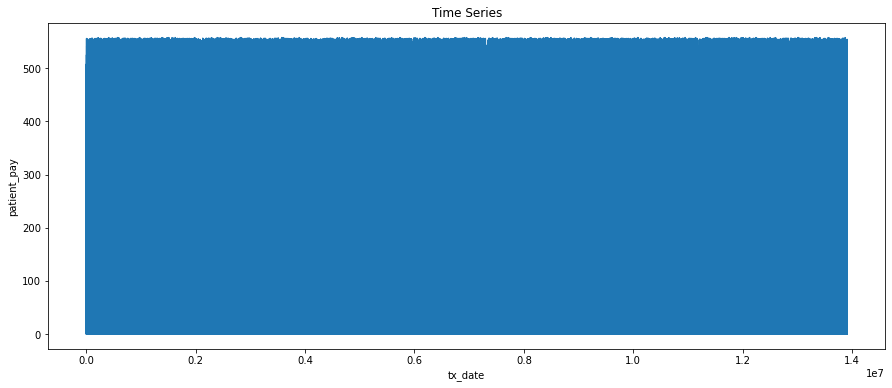

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
fig, ax1 = plt.subplots(figsize=(15, 6))
df['patient_pay'].plot(xlabel="tx_date", ylabel="patient_pay", title="Time Series",ax=ax1)


<AxesSubplot:title={'center':'Time Series'}, xlabel='tx_date', ylabel='patient_pay'>

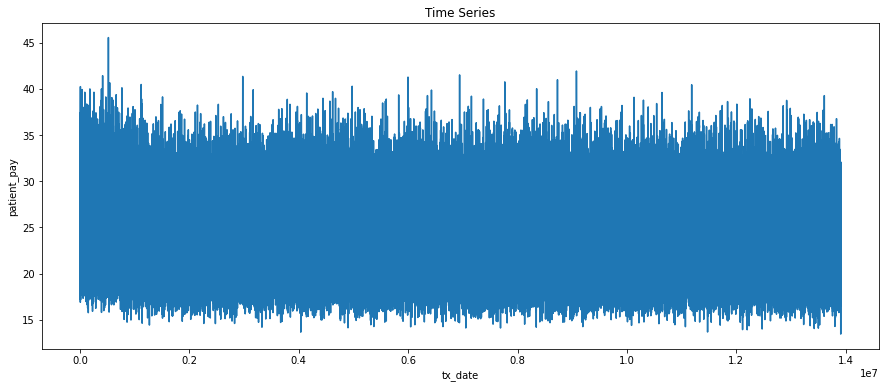

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))
df['patient_pay'].rolling(168).mean().plot(xlabel="tx_date", ylabel="patient_pay", title="Time Series",ax=ax)

<AxesSubplot:title={'center':'Time Series'}, xlabel='tx_date', ylabel='patient_pay'>

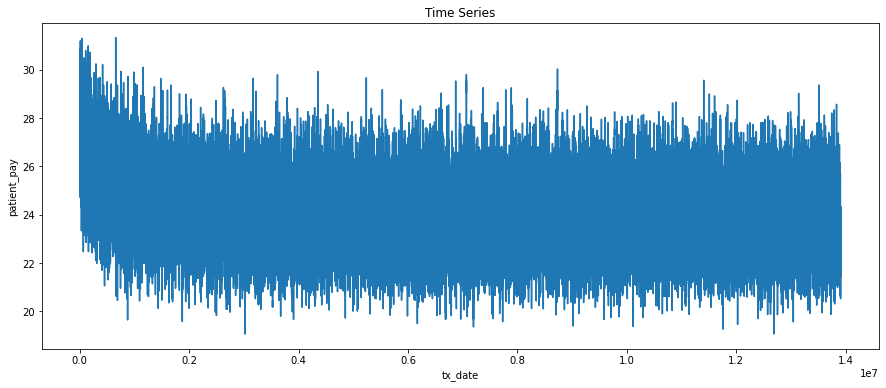

In [62]:
fig, ax = plt.subplots(figsize=(15, 6))
df['patient_pay'].rolling(1000).mean().plot(xlabel="tx_date", ylabel="patient_pay", title="Time Series",ax=ax)

Is there a reason at the begining of the year more transcation are higher?

In [63]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,bin,patient_pay
count,13910244.00000,13910244.00000
mean,573227.83019,24.06044
std,205259.99792,39.52487
min,96934.00000,0.00000
25%,322463.00000,8.85000
50%,664344.00000,13.26000
75%,725700.00000,18.89000
max,956971.00000,557.93000


In [64]:
df['drug'].nunique()

114

may be we have to create two columns here -- 1 specifiying braded or generic -- and another one the drug itself

-rejection or not based on branded vs not branded


In [65]:
df['drug'].unique()

array(['branded tanoclolol', 'branded oxasoted', 'branded cupitelol',
       'generic oxasoted', 'branded mamate', 'branded lalol',
       'branded foxivelule', 'generic foxivelule',
       'generic tafistitrisin', 'branded prazinib', 'generic momudobatin',
       'branded gentipapavir', 'branded cibroniudosin',
       'generic prazinib', 'branded rulfalol', 'generic keglusited',
       'branded pucomalol', 'generic tanoclolol', 'generic pucomalol',
       'generic cupitelol', 'branded glycontazepelol',
       'branded glycogane', 'generic cicrochoric', 'generic rulfalol',
       'branded satrade', 'branded tovane', 'generic suvinicuvir',
       'branded semufolic', 'branded sorine', 'generic ratin',
       'generic hozirol', 'generic glycontazepelol', 'branded dienulol',
       'generic hivir', 'branded diadaric', 'branded mule',
       'branded tocilic', 'generic cibroniudosin', 'branded gorol',
       'generic tovane', 'generic simarol', 'generic gorol',
       'generic vocopirin', 

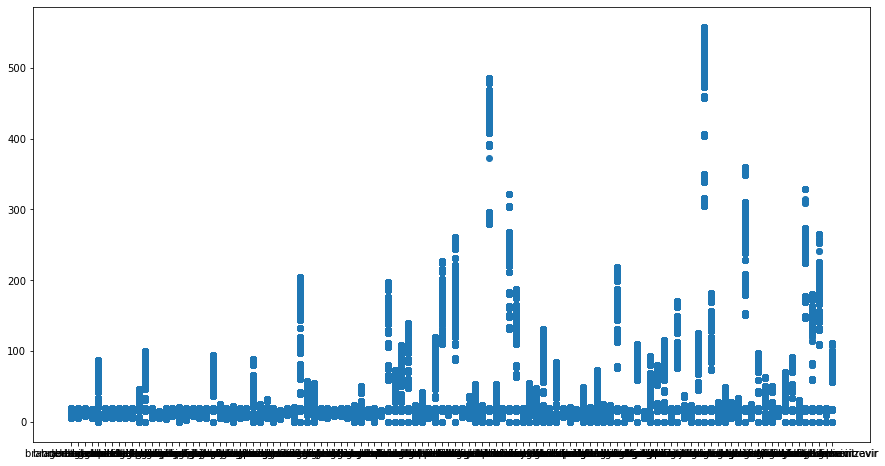

In [66]:
fig=plt.figure(figsize=(15,8))

plt.scatter(df['drug'], df['patient_pay'])

In [67]:
df.groupby(by='rejected').mean('patient_pay')

,bin,patient_pay
rejected,,
False,573854.05937,26.09971
True,565839.22698,0.00000


In [68]:
# This just shows average price by rejection or not:
df.groupby(by='rejected').mean('patient_pay')

,bin,patient_pay
rejected,,
False,573854.05937,26.09971
True,565839.22698,0.00000


In [69]:
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39000
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02000
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39000
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84000
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00000


In [70]:
#Separate the drug column to two columns
df[["drug_type","drug_name"]] =df['drug'].str.split(" ",expand=True)

In [71]:
#Separate the diagnonsis column column to two columns
df[["diagnosis_broad","diagnosis_specific"]] =df['diagnosis'].str.split(".",expand=True)

In [72]:
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,drug_type,drug_name,diagnosis_broad,diagnosis_specific
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39000,branded,tanoclolol,G99,93
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02000,branded,oxasoted,U60,52
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39000,branded,cupitelol,Q85,91
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84000,generic,oxasoted,U60,52
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00000,branded,mamate,N55,01


In [73]:
df['drug_type'].value_counts(normalize=True)

branded   0.62822
generic   0.37178
Name: drug_type, dtype: float64

In [74]:
df['drug_name'].value_counts(normalize=True)

prazinib       0.12306
rulfalol       0.05165
pucomalol      0.04000
mule           0.03906
tanoclolol     0.03690
                 ...  
dusin          0.00069
sizubesin      0.00058
gohevitravir   0.00030
lehydrome      0.00018
nenizevir      0.00008
Name: drug_name, Length: 77, dtype: float64

There are 77 drugs in the 14 million transactions. 

In [75]:
(df.groupby('drug_name')['drug_type'].count()).to_frame()

# (df.groupby('drug_type')['drug_name'].count()).to_frame()

,drug_type
drug_name,
antimab,304423
bovirol,210460
brede,120941
choxestamenium,111432
cibroniudosin,184287
...,...
tovane,317061
tricatripride,40865
tugesutin,105699


In [76]:
df['rejected'].value_counts(normalize=True)

False   0.92187
True    0.07813
Name: rejected, dtype: float64

In [77]:
df.isna().sum()

tx_date                     0
pharmacy                    0
diagnosis                   0
drug                        0
bin                         0
pcn                   3626961
group                 3909025
rejected                    0
patient_pay                 0
drug_type                   0
drug_name                   0
diagnosis_broad             0
diagnosis_specific          0
dtype: int64

### pcn and group?
what are pcn and group -- How to deal with the missing values?

Is there a relationship between medication being branded or not in leading Rejection and likelihood of rejection. 

In [78]:
df['rejected'].groupby(df['drug_type']) \
.value_counts(normalize=True). \
rename('frequency').to_frame() \
.reset_index()

,drug_type,rejected,frequency
0,branded,False,0.87831
1,branded,True,0.12169
2,generic,False,0.99546
3,generic,True,0.00454


Is rejection likely for certain types of diagnosis?

In [79]:
df['diagnosis_broad'].value_counts().head(20)

I68    2193157
G99    1386006
K32    1292235
Q85     775390
W50     718798
H36     679188
U60     530884
P07     491770
G51     435661
Q72     433350
U27     426311
K87     384569
M42     374057
Z66     318451
H60     216087
U61     211261
M06     166890
I38     162333
Y51     147379
C98     145635
Name: diagnosis_broad, dtype: int64

In [80]:
df['diagnosis_specific'].value_counts()

27    2224477
87    1395228
86    1394759
93    1386641
91     784434
       ...   
26        108
98         82
64         36
46         12
04         12
Name: diagnosis_specific, Length: 75, dtype: int64

#### We have super highly imbalanced catagorical variables. --for diagnosis

How do we address those? -- Combining some of the diagnosis possibly? -- Are there model performance issues that could come up from having catagorixal variables that are too few?

In [81]:
df['rejected'].groupby(df['diagnosis_broad']) \
.value_counts(normalize=True). \
to_frame() 

rejected
diagnosis_broad rejected          
A00             False      1.00000
A13             False      0.93861
                True       0.06139
A14             False      0.82997
                True       0.17003
...                            ...
Z66             True       0.30435
Z95             False      0.92593
                True       0.07407
Z98             False      0.95073
                True       0.04927

[247 rows x 1 columns]

In [82]:
df['rejected'].groupby(df['diagnosis_broad']) \
.value_counts(normalize=True). \
rename('frequency').to_frame() \
.reset_index().head(10)

,diagnosis_broad,rejected,frequency
0,A00,False,1.00000
1,A13,False,0.93861
2,A13,True,0.06139
3,A14,False,0.82997
4,A14,True,0.17003
5,A22,False,0.75000
6,A22,True,0.25000
7,A45,False,0.92240
8,A45,True,0.07760
9,B03,False,0.89198


It seems like A00 diagnosis always leads to full accetance. 

-- diagnosis specific should be considered with the broader one---

In [83]:
df['rejected'].groupby(df['diagnosis']) \
.value_counts(normalize=True). \
rename('frequency').to_frame() \
.reset_index().tail(20)

,diagnosis,rejected,frequency
235,Y08.66,True,0.16667
236,Y11.84,False,1.00000
237,Y51.55,False,0.90618
238,Y51.55,True,0.09382
239,Y97.47,False,0.88876
240,Y97.47,True,0.11124
241,Z04.98,False,0.93478
242,Z04.98,True,0.06522
243,Z20.23,False,0.67788
244,Z20.23,True,0.32212


-- Each medication has difference acceptance rate -- which ones are higher and which lower? -- The more common medications and diagnoris -- correlation(approval rate) between diagnosis and medication-- 

For each diagnosis which drugs are more likely to be accepted? Diagnosis and medication. 
Diagnosis and medication could be repition of the data. -- ( shrinkage and selection for correlated colums)

diagnosis and medication will have simlar information.-- There is certain number of medication for certain diagnosis. 

In [84]:
df['drug_name'].groupby(df['diagnosis']) \
.value_counts(normalize=True). \
rename('frequency').to_frame() \
.reset_index()

,diagnosis,drug_name,frequency
0,A00.82,glulune,0.65051
1,A00.82,antimab,0.34949
2,A13.39,oxasoted,0.17454
3,A13.39,tovane,0.16491
4,A13.39,colifunene,0.15302
...,...,...,...
502,Z98.86,oxasoted,0.34236
503,Z98.86,keglusited,0.27795
504,Z98.86,thiostasteglume,0.22987
505,Z98.86,spifistime,0.08494


pcn and group ---exploring insurance  further a way of missing values and how to deal with them.

Attempt a classification model 

***For the classification model we will start with a Decision Tree***

In [85]:
import sqlite3
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from category_encoders import OrdinalEncoder
from IPython.display import VimeoVideo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [86]:
# conda install category_encoders

In [87]:
#Build Model
model = make_pipeline( \
OrdinalEncoder(), DecisionTreeClassifier( \
random_state=42))


In [88]:
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,drug_type,drug_name,diagnosis_broad,diagnosis_specific
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39000,branded,tanoclolol,G99,93
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02000,branded,oxasoted,U60,52
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39000,branded,cupitelol,Q85,91
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84000,generic,oxasoted,U60,52
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00000,branded,mamate,N55,01


In [89]:
#missing values
df.isnull().sum()

tx_date                     0
pharmacy                    0
diagnosis                   0
drug                        0
bin                         0
pcn                   3626961
group                 3909025
rejected                    0
patient_pay                 0
drug_type                   0
drug_name                   0
diagnosis_broad             0
diagnosis_specific          0
dtype: int64

In [90]:
df1 = df.copy()

In [91]:
# to train the trees with missing values
df.fillna('Missing',inplace=True)

In [92]:
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,drug_type,drug_name,diagnosis_broad,diagnosis_specific
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,Missing,False,13.39000,branded,tanoclolol,G99,93
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,Missing,52H8KH0F83K,False,7.02000,branded,oxasoted,U60,52
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,Missing,False,13.39000,branded,cupitelol,Q85,91
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84000,generic,oxasoted,U60,52
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,Missing,ZX2QUWR,False,47.00000,branded,mamate,N55,01


In [93]:
#missing values
df.isnull().sum()

tx_date               0
pharmacy              0
diagnosis             0
drug                  0
bin                   0
pcn                   0
group                 0
rejected              0
patient_pay           0
drug_type             0
drug_name             0
diagnosis_broad       0
diagnosis_specific    0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910244 entries, 0 to 13910243
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   tx_date             datetime64[ns]
 1   pharmacy            object        
 2   diagnosis           object        
 3   drug                object        
 4   bin                 int64         
 5   pcn                 object        
 6   group               object        
 7   rejected            bool          
 8   patient_pay         float64       
 9   drug_type           object        
 10  drug_name           object        
 11  diagnosis_broad     object        
 12  diagnosis_specific  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 1.3+ GB


In [95]:
target = "rejected"
# our target variable
y = df[target]

In [96]:
notneeded = ['tx_date','pharmacy','diagnosis','drug','patient_pay','rejected']
#features
X = df.drop(columns=['tx_date','pharmacy','diagnosis','drug','patient_pay','rejected'])

In [97]:
df1.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,drug_type,drug_name,diagnosis_broad,diagnosis_specific
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39000,branded,tanoclolol,G99,93
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02000,branded,oxasoted,U60,52
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39000,branded,cupitelol,Q85,91
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84000,generic,oxasoted,U60,52
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00000,branded,mamate,N55,01


## GRADIENT BOOSTING TREE MODEL

 Boosting -- weak learner 

####  Positive Class: Rejected(Not Accepeted)  |||Negative Class: Accepted

In [104]:
import pickle
from sklearn.preprocessing import OneHotEncoder
import ipywidgets as widgets #interactive dashboard
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import VimeoVideo
from ipywidgets import interact #interactive dashboard
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

In [49]:
# conda install -c conda-forge imbalanced-learn

# TEST and TRAININING SETS

In [50]:
X_train, X_test, y_train, y_test = train_test_split( \
X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11128195, 7)
y_train shape: (11128195,)
X_test shape: (2782049, 7)
y_test shape: (2782049,)


# RESAMPLE USING UNDER-SAMPLING

In [51]:
#oversampling takes too long to train so Under sampling given our computing power
under_sampler = RandomUnderSampler(random_state=42)
X_train_over, y_train_over = under_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()


X_train_over shape: (1738886, 7)


,bin,pcn,group,drug_type,drug_name,diagnosis_broad,diagnosis_specific
0,664344,Missing,STGRDKR1J5RD,generic,hozirol,G99,93
1,539437,Missing,1CAHL,branded,sizubesin,N27,23
2,725700,1UQC,Missing,generic,colifunene,Y51,55
3,160389,RB7UU,RS5RB3YA,branded,mule,I68,27
4,691847,XH4T3,GOM8K0,generic,pucomalol,Q85,91


# BUILD BASELINE MODEL

In [52]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy is:", round(acc_baseline, 4))

Baseline Accuracy is: 0.9219


## Create a ppeline for an ensemble model for our classifier


In [53]:
# we are using ordinal encoder here-- may be there are better ways to approach it?
clf = make_pipeline(OrdinalEncoder(),GradientBoostingClassifier())

### Create our hyperparamters -- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [ ]:
# we can add more -- For now we can use the two
# create dictionary for hyperparamters
params = { \
'gradientboostingclassifier__n_estimators':range(20,31,5), \
'gradientboostingclassifier__max_depth':range(2,5) \
}
                          
params


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# We will use Grid search
# we can use shuffle as well 
# we can use 100fold CV but computing power
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
model = GridSearchCV(clf, param_grid=params, cv=5,n_jobs=-1, verbose=1)

## FIT MODEL ON OVERSAMPLE DATA

In [ ]:
# Fit model to over-sampled training data
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Above we can see that we n estimators times maxdepth times CV equals to the number of fits. 

The trees are trained is sequence in gradient boosting -- which makes it take longer time(aka computationally expensive). learning_rate could be updated to reduce the amount of time. 

Extract the CV results from model

In [ ]:
# extract results 
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

In [ ]:
# Let us extract the best hyperparamters from our model
# Extract best hyperparameters
model.best_params_

In [ ]:
# training and test accuracy of our model
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

## CONFUSION MATRIX

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [ ]:
# The first five predictions
model.predict(X_test)[:5]

In [ ]:
# The first five predictions probability
model.predict_proba(X_test)[:5,-1]

In [ ]:
# FALSE is from perspective of our negative class
# TRUE is from perspective of our positive class
# THis is when our threshold is 0.5
# Print classification report
print(classification_report(y_test,model.predict(X_test)))

$$ \text{precision} = \frac{\text{TP}}{TP + FP}$$

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}. $$

Precision involves making careful decision. Meaning we will only say rejected when we are very certain. Lower the threshold. 



Recall involved catching all rejections.Meaning we want to catch as many of the rejection claims as possible. Increase the threshold. 


**Since, we dont want to tell a patient they will be rejected unless we are VERY certain, we aim to have a high precision score. They can then file claim???**

Which is ideal?

What do you think is the cost of a False Positive(\\$500) and False Negative(\\$20)?



????
If we incorrectly tell patients that they will be rejected(False Positive)--Let us assume it will result a cost of \\$ 500 to the patient. We came up with this number as the maximimum amount a patient paid was \\$500.

If we incorrectly tell patients that they will be accepted(False Negative). We are giving the patients \\$20 . This is the median amount paid for those that are accepted. 


In [ ]:
def make_cnf_matrix(threshold):
    y_pred_proba = model.predict_proba(X_test)[:,-1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = conf_matrix.ravel()
    print(f'Profit: ${tp*500}')
    print(f'Losses: ${fp*50} ')
    print(f'Precision: {tp/(tp+fp)}')
    print(f'Specificity: {tn/(tn+fp)}')
    print(f'Recall: {tp/(tp+fn)}')
    ConfusionMatrixDisplay.from_predictions \
    (y_test,y_pred,colorbar=False)


#The user will put the value in here. 
thresh_widget = widgets.FloatSlider(min=0, \
max=1 , value=0.5 , step=0.05)

#This is where the input will be set in to the passed to the function
interact(make_cnf_matrix, threshold=thresh_widget);

## SAVE MODEL

In [ ]:
# TO avoid retraining our model everytime we can save it 
# Save model
with open('model-gradientboost.pkl','wb') as f:
    pickle.dump(model,f)

We can create also create module then use it to make predictions after doing all the transformations that has been done. 

# XGB MODEL

In [98]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [99]:
# conda install xgboost

### Train -Test Split

In [100]:
target = "rejected"
# our target variable
y1 = df1[target]

In [101]:
notneeded = ['tx_date','pharmacy','diagnosis','drug','patient_pay','rejected']
#features
X1 = df1.drop(columns=['tx_date','pharmacy','diagnosis','drug','patient_pay','rejected'])

In [102]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( \
X1,y1,test_size=0.2,random_state=42, stratify =y )

print("X_train shape:", X_train1.shape)
print("y_train shape:", y_train1.shape)
print("X_test shape:", X_test1.shape)
print("y_test shape:", y_test1.shape)

X_train shape: (11128195, 7)
y_train shape: (11128195,)
X_test shape: (2782049, 7)
y_test shape: (2782049,)


### Resample using oversampling

In [20]:
#oversampling takes too long to train so Under sampling given our computing power
over_sampler = RandomOverSampler(random_state=42)
X_train_over1, y_train_over1 = over_sampler.fit_resample(X_train1,y_train1)
print("X_train_over shape:", X_train_over1.shape)

X_train_over shape: (20517414, 3)


In [49]:
X_train_over1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517414 entries, 0 to 20517413
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   bin     int64 
 1   pcn     object
 2   group   object
dtypes: int64(1), object(2)
memory usage: 469.6+ MB


## BASELINE MODEL PREDICTION

In [21]:
acc_baseline = y_train1.value_counts(normalize=True).max()
print("Baseline Accuracy is:", round(acc_baseline, 4))

Baseline Accuracy is: 0.9219


## XGB CLASSIFIER

In [105]:
# we are using ordinal encoder here-- may be there are better ways to approach it?
clf1 = make_pipeline(OneHotEncoder(),XGBClassifier())

In [106]:
# specify the parameters you want to search
parameters = {
    # "xgbclassifier__learning_rate": [0.1, 0.2, 0.3],
    "xgbclassifier__n_estimators": range(20, 31, 5),
    "xgbclassifier__max_depth": [3, 4, 5]
}

In [107]:
#use Gridsearch 
model1 = GridSearchCV(clf1, param_grid=parameters, cv=5,n_jobs=-1, verbose=1)

In [ ]:
# train model on oversampled data
# Fit model to over-sampled training data
model1.fit(X_train_over1,y_train_over1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
